# Assess model performance - collate data using script

C:\Users\robot\code\ml\landsat\collate_validation_metrics.py

In [3]:
!conda info


     active environment : tf_grid2.13
    active env location : C:\Users\robot\anaconda3\envs\tf_grid2.13
            shell level : 1
       user config file : C:\Users\robot\.condarc
 populated config files : C:\Users\robot\.condarc
          conda version : 23.7.4
    conda-build version : 3.26.1
         python version : 3.11.5.final.0
       virtual packages : __archspec=1=x86_64
                          __cuda=12.6=0
                          __win=0=0
       base environment : C:\Users\robot\anaconda3  (writable)
      conda av data dir : C:\Users\robot\anaconda3\etc\conda
  conda av metadata url : None
           channel URLs : https://repo.anaconda.com/pkgs/main/win-64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/r/win-64
                          https://repo.anaconda.com/pkgs/r/noarch
                          https://repo.anaconda.com/pkgs/msys2/win-64
                          https://repo.an

In [1]:
import os
import pandas as pd
import math
import ast
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display, Markdown
%matplotlib inline

# Disable scientific notation for pandas display
pd.set_option('display.float_format', lambda x: '%.10f' % x)

In [2]:
# # Directory path to search through
# directory_ = r'H:\biomass'
# model_run = "test_train_all04_05"
# model_run = "model_all01_02_03_04_05_06_v2"
# 
# 
# directory_path = os.path.join(directory_, f"model_{model_run}")
# 
# combined_df = pd.read_csv(os.path.join(directory_path, "total_metrics.csv"))

In [3]:
# Directory path to search through
directory_ = r'H:\biomass'
model_run = "test_train_mlp"
model_run = "model_all01_02_03_04_05_06_v3"

directory_path = os.path.join(directory_, f"{model_run}")

combined_df = pd.read_csv(os.path.join(directory_path, "total_metrics.csv"))

## Split into groups based on status

In [4]:
retrain_df = combined_df[combined_df["status"]=="retrain"]
retest_df = combined_df[combined_df["status"]=="retest"]

In [5]:
retest_df

,r2,mse,rmse,mae,mape,bias,n,mdl,status,var,fac,stdev,sel_num,data,stats,features,model,file
0,0.6700000000,41832601.0799999982,6467.8100000000,4355.9000000000,417884883.3100000024,2268.1100000000,32,RFR,retest,all03_rs30,r2,3,40,all0,mean,"['dbifmdry_r43', 'b1_h99_mean', 'b1_hmc_mean',...","RandomForestRegressor(max_depth=10, max_featur...",all03_rs30_r2_RFR_sel_40_variable_score.csv
1,0.6800000000,41786712.8100000024,6464.2600000000,4407.3100000000,410526951.3199999928,2157.7700000000,32,RFR,retest,all03_rs30,r2,3,25,all0,mean,"['b1_ccw_dry_mean', 'b1_h99_mean', 'b1_hmc_mea...","RandomForestRegressor(max_depth=10, max_featur...",all03_rs30_r2_RFR_sel_25_variable_score.csv
2,0.6800000000,41012503.4600000009,6404.1000000000,4385.1000000000,481631907.7300000191,1801.6300000000,32,RFR,retest,all03_rs30,r2,3,20,all0,mean,"['b1_ccw_dry_mean', 'b1_h25_mean', 'b1_hsd_mea...","RandomForestRegressor(max_depth=10, max_featur...",all03_rs30_r2_RFR_sel_20_variable_score.csv
3,0.6800000000,41630922.2599999979,6452.2000000000,4469.1000000000,458893368.3600000143,1857.6000000000,32,RFR,retest,all03_rs30,r2,3,15,all0,mean,"['b5_dbifm_mean', 'b1_dp1fm_mean', 'b1_ccw_dry...","RandomForestRegressor(max_depth=10, max_featur...",all03_rs30_r2_RFR_sel_15_variable_score.csv
4,0.6700000000,42602886.6899999976,6527.0900000000,4386.6300000000,540007166.8200000525,1546.6600000000,32,RFR,retest,all03_rs30,r2,3,12,all0,mean,"['b2_dp1fm_mean', 'b1_dbifm_mean', 'b1_hmc_mea...","RandomForestRegressor(max_depth=10, max_featur...",all03_rs30_r2_RFR_sel_12_variable_score.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3019,-0.3600000000,106607214.3599999994,10325.0800000000,7059.5300000000,203307934.5399999917,6627.1100000000,32,MLP,retest,all02_rs30,RMSE,3,25,all0,p99,"['b1_ccw_dry_p99', 'b1_dp1fm_dry_p99', 'b1_wfp...","Pipeline(steps=[('scaler', StandardScaler()),\...",all02_rs30_RMSE_MLP_sel_25_variable_score.csv
3020,-0.4300000000,111629419.0799999982,10565.4800000000,7164.8000000000,131525693.9899999946,6892.4200000000,32,MLP,retest,all02_rs30,RMSE,3,20,all0,p99,"['b1_hmc_p99', 'b2_dp1fm_p99', 'b6_dbifm_p99',...","Pipeline(steps=[('scaler', StandardScaler()),\...",all02_rs30_RMSE_MLP_sel_20_variable_score.csv
3021,-0.5100000000,118189092.0000000000,10871.4800000000,7295.2200000000,53306297.4799999967,7188.6100000000,32,MLP,retest,all02_rs30,RMSE,3,15,all0,p99,"['b1_hcv_p99', 'b1_wfp_dry_p99', 'b1_dp1fm_p99...","Pipeline(steps=[('scaler', StandardScaler()),\...",all02_rs30_RMSE_MLP_sel_15_variable_score.csv
3022,-0.5600000000,122444297.5199999958,11065.4600000000,7485.3500000000,96764816.0000000000,7285.0800000000,32,MLP,retest,all02_rs30,RMSE,3,12,all0,p99,"['b3_dp1fm_dry_p99', 'b1_dp1fm_dry_p99', 'b1_c...","Pipeline(steps=[('scaler', StandardScaler()),\...",all02_rs30_RMSE_MLP_sel_12_variable_score.csv


# Join Validation and Train together

In [6]:
df_merged = pd.merge(retrain_df, retest_df, on=['mdl', 'model', 'sel_num', 'fac', 'var', 'file', 'stats', 'data', 'stdev'], how='outer')

In [7]:
# Rename columns containing "_x" to "validation" and "_y" to "train"
df_merged.columns = df_merged.columns.str.replace('_x', '_retrain').str.replace('_y', '_retest')
df_merged

,r2_retrain,mse_retrain,rmse_retrain,mae_retrain,mape_retrain,bias_retrain,n_retrain,status_retrain,features_retrain,r2_retest,...,status_retest,var,fac,stdev,sel_num,data,stats,features_retest,model,file
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6700000000,...,retest,all03_rs30,r2,3,40,all0,mean,"['dbifmdry_r43', 'b1_h99_mean', 'b1_hmc_mean',...","RandomForestRegressor(max_depth=10, max_featur...",all03_rs30_r2_RFR_sel_40_variable_score.csv
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6800000000,...,retest,all03_rs30,r2,3,25,all0,mean,"['b1_ccw_dry_mean', 'b1_h99_mean', 'b1_hmc_mea...","RandomForestRegressor(max_depth=10, max_featur...",all03_rs30_r2_RFR_sel_25_variable_score.csv
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6800000000,...,retest,all03_rs30,r2,3,20,all0,mean,"['b1_ccw_dry_mean', 'b1_h25_mean', 'b1_hsd_mea...","RandomForestRegressor(max_depth=10, max_featur...",all03_rs30_r2_RFR_sel_20_variable_score.csv
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6800000000,...,retest,all03_rs30,r2,3,15,all0,mean,"['b5_dbifm_mean', 'b1_dp1fm_mean', 'b1_ccw_dry...","RandomForestRegressor(max_depth=10, max_featur...",all03_rs30_r2_RFR_sel_15_variable_score.csv
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6700000000,...,retest,all03_rs30,r2,3,12,all0,mean,"['b2_dp1fm_mean', 'b1_dbifm_mean', 'b1_hmc_mea...","RandomForestRegressor(max_depth=10, max_featur...",all03_rs30_r2_RFR_sel_12_variable_score.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.3600000000,...,retest,all02_rs30,RMSE,3,25,all0,p99,"['b1_ccw_dry_p99', 'b1_dp1fm_dry_p99', 'b1_wfp...","Pipeline(steps=[('scaler', StandardScaler()),\...",all02_rs30_RMSE_MLP_sel_25_variable_score.csv
3020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.4300000000,...,retest,all02_rs30,RMSE,3,20,all0,p99,"['b1_hmc_p99', 'b2_dp1fm_p99', 'b6_dbifm_p99',...","Pipeline(steps=[('scaler', StandardScaler()),\...",all02_rs30_RMSE_MLP_sel_20_variable_score.csv
3021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5100000000,...,retest,all02_rs30,RMSE,3,15,all0,p99,"['b1_hcv_p99', 'b1_wfp_dry_p99', 'b1_dp1fm_p99...","Pipeline(steps=[('scaler', StandardScaler()),\...",all02_rs30_RMSE_MLP_sel_15_variable_score.csv
3022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5600000000,...,retest,all02_rs30,RMSE,3,12,all0,p99,"['b3_dp1fm_dry_p99', 'b1_dp1fm_dry_p99', 'b1_c...","Pipeline(steps=[('scaler', StandardScaler()),\...",all02_rs30_RMSE_MLP_sel_12_variable_score.csv


In [8]:
def plot_best_model(df, model_run, model, var, data, std, display_limit):
    #df = df.sort_values(by=['rmse_retest', 'r2_retest', 'rmse_retrain', 'r2_retrain'], ascending=[True, False, True, False])
    df = df.sort_values(by=['rmse_retest'], ascending=[True])

    # Generate the Windows path
    df["file_path"] = (
        f"H:/biomass/{model_run}/AGB/" +
        df['var'].astype(str) + "/" +
        df['mdl'].astype(str) + "/" +
        df['stats'].astype(str) + "/std" +
        #df['stdev'].astype(str) + "/" +
        df['stdev'].astype(int).astype(str) + "/" + 
        df['data'].astype(str) + "/" +
        df['fac'].astype(str) + "/sel_num_" +
        df['sel_num'].astype(str).str[:2]
    )

    # Loop through each row in the DataFrame and print out the relevant information
    for i, row in enumerate(df.itertuples(index=False)):

        # Limit the number of displayed image sets to prevent memory overload
        if i >= display_limit:
            print("Display limit reached. Adjust the display limit to see more images.")
            break  # Stop after showing the defined number of image sets

        # Extract validation and test (retest) metrics from the row
        test_metrics = {
            'R² (retest)': getattr(row, 'r2_retest', np.nan),
            'MSE (retest)': getattr(row, 'mse_retest', np.nan),
            'RMSE (retest)': getattr(row, 'rmse_retest', np.nan),
            'MAE (retest)': getattr(row, 'mae_retest', np.nan),
            'MAPE (retest)': getattr(row, 'mape_retest', np.nan),
            'Bias (retest)': getattr(row, 'bias_retest', np.nan),
            'N (retest)': getattr(row, 'n_retest', np.nan)
        }

        retrain_metrics = {
            'R² (retrain)': getattr(row, 'r2_retrain', np.nan),
            'MSE (retrain)': getattr(row, 'mse_retrain', np.nan),
            'RMSE (retrain)': getattr(row, 'rmse_retrain', np.nan),
            'MAE (retrain)': getattr(row, 'mae_retrain', np.nan),
            'MAPE (retrain)': getattr(row, 'mape_retrain', np.nan),
            'Bias (retrain)': getattr(row, 'bias_retrain', np.nan),
            'N (retrain)': getattr(row, 'n_retrain', np.nan)
        }

        # Generate and display images (retest and validation as before)
        path = row.file_path
        print(f"Path: {path}")

        # Log the path being used to ensure the correct images are selected
        #print(f"Looking for image files in: {path}")

        # Split the path after "AGB" and keep the rest of the path
        base, after_agb = path.split("AGB", 1)

        # Replace forward slashes with underscores in the part after "AGB"
        after_agb_modified = after_agb.replace("/", "_")
        df.at[i, "apply_mdl"] = after_agb_modified[1:]  # Update the DataFrame
        print(f"If using - create directory: {after_agb_modified[1:]}")

        # Locate the directory and find files ending with retest.JPG and validation.JPG
        search_path = os.path.join(path, "*.JPG")  # Search for all JPG files in the directory

        # Get all JPG files
        jpg_files = glob.glob(search_path)

        # Filter for files ending with retest.JPG and validation.JPG
        retest_files = [file for file in jpg_files if file.endswith("retest.JPG")]
        retrain_files = [file for file in jpg_files if file.endswith("retrain.JPG")]

        # Log file paths to check which files are being imported
        if retest_files:
            print(f" - Retest Image found: {retest_files[0]}")
            #print(retest_files)
        else:
            print("No Retest Image found.")
            print("ERROR --"*50)

        if retrain_files:
            print(f" - retrain Image found: {retrain_files[0]}")
            #print(retrain_files)
        else:
            print("No retrain Image found.")
            print("ERROR --"*50)

        # **NEW** Search for files ending with retrain_distribution.JPG two sub-directories above the original path
        distribution_dir = os.path.abspath(os.path.join(path, "../.."))  # Two directories above
        distribution_search_path = os.path.join(distribution_dir, "*retrain_distribution.JPG")

        # Check if the retrain_distribution.JPG exists
        distribution_files = glob.glob(distribution_search_path)  # Search for the file

        #print("distribution_files: ", distribution_files)
        if len(distribution_files) > 0:
            #print(f"retrain Distribution Plot found at: {distribution_files[0]}")
            fig, ax = plt.subplots(figsize=(10, 8), dpi=150)  # Increase size and DPI for better quality
            retrain_distribution_img = mpimg.imread(distribution_files[0])
            ax.imshow(retrain_distribution_img)
            ax.set_title('retrain Distribution Plot', fontsize=16)  # Increased font size
            ax.axis('off')  # Turn off axis display
            plt.tight_layout()
            plt.show()

        # Plot the found JPG files (retest and retrain) side by side
        if retest_files or retrain_files:
            fig, axes = plt.subplots(1, 2, figsize=(12, 6), dpi=150)  # Larger figure and higher DPI

            # Load and display the retest image (if available)
            if retest_files:
                retest_img = mpimg.imread(retest_files[0])
                axes[0].imshow(retest_img)
                axes[0].set_title('Retest Image', fontsize=16)  # Increased font size
                axes[0].axis('off')  # Turn off axis display
            else:
                axes[0].axis('off')  # Leave the subplot blank if no image is available

            # Load and display the retrain image (if available)
            if retrain_files:
                retrain_img = mpimg.imread(retrain_files[0])
                axes[1].imshow(retrain_img)
                axes[1].set_title('retrain Image', fontsize=16)  # Increased font size
                axes[1].axis('off')  # Turn off axis display
            else:
                axes[1].axis('off')  # Leave the subplot blank if no image is available

            # Adjust layout and show the images
            plt.tight_layout(pad=2.0)  # Add padding between images
            plt.show()

            # Clear the figure from memory after displaying it
            plt.close()
            print("-" * 100)
            # Print the test and retrain metrics for comparison
            print(f"Test Metrics vs retrain Metrics for row {i}:")
            # for metric in test_metrics:
            #     print(f"{metric}: {test_metrics[metric]}"  |  {retrain_metric_name}: {retrain_metrics.get(retrain_metric_name, 'N/A')}")

            print("="*100)
        # Print the relevant features
        print(f"Features Used: {row.features_retest}")
        print("-" * 100)

    print("exported to: ", r"C:\Users\robot\code\pipelines\apply_biomass\{0}_{1}_{2}_{3}_{4}_overall_best.csv".format(
        model_run, model, var, data, std))
    # Save the updated DataFrame to a CSV file
    df.to_csv(r"C:\Users\robot\code\pipelines\apply_biomass\{0}_{1}_{2}_{3}_{4}_overall_best.csv".format(
        model_run, model, var, data, std))
    
    return df

In [9]:
def plot_best_model(df, model_run, model, var, data, std, display_limit):
    # Sort the DataFrame
    df = df.sort_values(by=['rmse_retest'], ascending=[True])

    # Generate the Windows path
    df["file_path"] = (
        f"H:/biomass/{model_run}/AGB/" +
        df['var'].astype(str) + "/" +
        df['mdl'].astype(str) + "/" +
        df['stats'].astype(str) + "/std" +
        df['stdev'].astype(int).astype(str) + "/" + 
        df['data'].astype(str) + "/" +
        df['fac'].astype(str) + "/sel_num_" +
        df['sel_num'].astype(str).str[:2]
    )

    # Loop through each row in the DataFrame and print out the relevant information
    for i, row in enumerate(df.itertuples(index=False)):

        # Limit the number of displayed image sets to prevent memory overload
        if i >= display_limit:
            print("Display limit reached. Adjust the display limit to see more images.")
            break

        # Extract validation and test (retest) metrics from the row
        test_metrics = {
            'R² (retest)': getattr(row, 'r2_retest', np.nan),
            'MSE (retest)': getattr(row, 'mse_retest', np.nan),
            'RMSE (retest)': getattr(row, 'rmse_retest', np.nan),
            'MAE (retest)': getattr(row, 'mae_retest', np.nan),
            'MAPE (retest)': getattr(row, 'mape_retest', np.nan),
            'Bias (retest)': getattr(row, 'bias_retest', np.nan),
            'N (retest)': getattr(row, 'n_retest', np.nan)
        }

        retrain_metrics = {
            'R² (retrain)': getattr(row, 'r2_retrain', np.nan),
            'MSE (retrain)': getattr(row, 'mse_retrain', np.nan),
            'RMSE (retrain)': getattr(row, 'rmse_retrain', np.nan),
            'MAE (retrain)': getattr(row, 'mae_retrain', np.nan),
            'MAPE (retrain)': getattr(row, 'mape_retrain', np.nan),
            'Bias (retrain)': getattr(row, 'bias_retrain', np.nan),
            'N (retrain)': getattr(row, 'n_retrain', np.nan)
        }

        # Generate and display images (retest and validation as before)
        path = row.file_path
        print(f"Path: {path}")
        
        # Split the path after "AGB" and keep the rest of the path
        base, after_agb = path.split("AGB", 1)

        # Replace forward slashes with underscores in the part after "AGB"
        after_agb_modified = after_agb.replace("/", "_")
        df.at[i, "apply_mdl"] = after_agb_modified[1:]  # Update the DataFrame
        print(f"If using - create directory: {after_agb_modified[1:]}")

        # Locate the directory and find files ending with retest.JPG and validation.JPG
        search_path = os.path.join(path, "*.JPG")  # Search for all JPG files in the directory
        jpg_files = glob.glob(search_path)

        # Filter for files ending with retest.JPG and validation.JPG
        retest_files = [file for file in jpg_files if file.endswith("retest.JPG")]
        retrain_files = [file for file in jpg_files if file.endswith("retrain.JPG")]

        # Log file paths to check which files are being imported
        if retest_files:
            print(f" - Retest Image found: {retest_files[0]}")
        else:
            print("No Retest Image found.")
            print("ERROR --" * 50)

        if retrain_files:
            print(f" - retrain Image found: {retrain_files[0]}")
        else:
            print("No retrain Image found.")
            print("ERROR --" * 50)

        # **NEW** Search for files ending with retrain_distribution.JPG two sub-directories above the original path
        distribution_dir = os.path.abspath(os.path.join(path, "../.."))  # Two directories above
        distribution_search_path = os.path.join(distribution_dir, "*retrain_distribution.JPG")

        # Check if the retrain_distribution.JPG exists
        distribution_files = glob.glob(distribution_search_path)  # Search for the file

        if len(distribution_files) > 0:
            fig, ax = plt.subplots(figsize=(10, 8), dpi=150)  # Increase size and DPI for better quality
            retrain_distribution_img = mpimg.imread(distribution_files[0])
            ax.imshow(retrain_distribution_img)
            ax.set_title('retrain Distribution Plot', fontsize=16)  # Increased font size
            ax.axis('off')  # Turn off axis display
            plt.tight_layout()
            plt.show()

        # Plot the found JPG files (retest and retrain) side by side
        if retest_files or retrain_files:
            fig, axes = plt.subplots(1, 2, figsize=(12, 6), dpi=150)  # Larger figure and higher DPI

            # Load and display the retest image (if available)
            if retest_files:
                retest_img = mpimg.imread(retest_files[0])
                axes[0].imshow(retest_img)
                axes[0].set_title('Retest Image', fontsize=16)  # Increased font size
                axes[0].axis('off')  # Turn off axis display
            else:
                axes[0].axis('off')  # Leave the subplot blank if no image is available

            # Load and display the retrain image (if available)
            if retrain_files:
                retrain_img = mpimg.imread(retrain_files[0])
                axes[1].imshow(retrain_img)
                axes[1].set_title('retrain Image', fontsize=16)  # Increased font size
                axes[1].axis('off')  # Turn off axis display
            else:
                axes[1].axis('off')  # Leave the subplot blank if no image is available

            # Adjust layout and show the images
            plt.tight_layout(pad=2.0)  # Add padding between images
            plt.show()

            # Clear the figure from memory after displaying it
            plt.close()
            print("-" * 100)

        from IPython.display import display
        import pandas as pd
        
        # Assuming test_metrics and retrain_metrics are dictionaries with metric names as keys
        metrics_table = pd.DataFrame({
            'Metric': list(test_metrics.keys()),
            'Retest': list(test_metrics.values()),
            'Retrain': [retrain_metrics[metric.replace('(retest)', '(retrain)')] for metric in test_metrics.keys()]
        })
        
        # Display the table
        display(metrics_table)

        #print(metrics_table.to_string(index=False))
        print("=" * 100)

        # Print the relevant features
        print(f"Features Used: {row.features_retest}")
        print("-" * 100)

    print("exported to: ", r"C:\Users\robot\code\pipelines\apply_biomass\{0}_{1}_{2}_{3}_{4}_overall_best.csv".format(
        model_run, model, var, data, std))
    # Save the updated DataFrame to a CSV file
    
    return df, model_run, model, var, data, std

In [16]:
# Adjust filtering condition for R² if necessary
df_low_rmse = df_merged[(df_merged['rmse_retest'] <= 7000.0) & (df_merged['r2_retest'] >= 0.6)] #\
   #                     & (df_merged['rmse_test'] <= 12000.0) & (df_merged['r2_test'] >= 0.6)]  # Adjusted to 0.5 assuming typical R² values

In [17]:
#'rmse_retest', 'r2_retest', 'rmse_retrain', 'r2_retrain'

In [10]:
df_low_rmse = df_merged

In [11]:
print(list(df_low_rmse))

['r2_retrain', 'mse_retrain', 'rmse_retrain', 'mae_retrain', 'mape_retrain', 'bias_retrain', 'n_retrain', 'status_retrain', 'features_retrain', 'r2_retest', 'mse_retest', 'rmse_retest', 'mae_retest', 'mape_retest', 'bias_retest', 'n_retest', 'mdl', 'status_retest', 'var', 'fac', 'stdev', 'sel_num', 'data', 'stats', 'features_retest', 'model', 'file']


In [12]:
print(len(df_low_rmse))

3024


In [13]:
df_low_rmse

,r2_retrain,mse_retrain,rmse_retrain,mae_retrain,mape_retrain,bias_retrain,n_retrain,status_retrain,features_retrain,r2_retest,...,status_retest,var,fac,stdev,sel_num,data,stats,features_retest,model,file
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6700000000,...,retest,all03_rs30,r2,3,40,all0,mean,"['dbifmdry_r43', 'b1_h99_mean', 'b1_hmc_mean',...","RandomForestRegressor(max_depth=10, max_featur...",all03_rs30_r2_RFR_sel_40_variable_score.csv
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6800000000,...,retest,all03_rs30,r2,3,25,all0,mean,"['b1_ccw_dry_mean', 'b1_h99_mean', 'b1_hmc_mea...","RandomForestRegressor(max_depth=10, max_featur...",all03_rs30_r2_RFR_sel_25_variable_score.csv
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6800000000,...,retest,all03_rs30,r2,3,20,all0,mean,"['b1_ccw_dry_mean', 'b1_h25_mean', 'b1_hsd_mea...","RandomForestRegressor(max_depth=10, max_featur...",all03_rs30_r2_RFR_sel_20_variable_score.csv
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6800000000,...,retest,all03_rs30,r2,3,15,all0,mean,"['b5_dbifm_mean', 'b1_dp1fm_mean', 'b1_ccw_dry...","RandomForestRegressor(max_depth=10, max_featur...",all03_rs30_r2_RFR_sel_15_variable_score.csv
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6700000000,...,retest,all03_rs30,r2,3,12,all0,mean,"['b2_dp1fm_mean', 'b1_dbifm_mean', 'b1_hmc_mea...","RandomForestRegressor(max_depth=10, max_featur...",all03_rs30_r2_RFR_sel_12_variable_score.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.3600000000,...,retest,all02_rs30,RMSE,3,25,all0,p99,"['b1_ccw_dry_p99', 'b1_dp1fm_dry_p99', 'b1_wfp...","Pipeline(steps=[('scaler', StandardScaler()),\...",all02_rs30_RMSE_MLP_sel_25_variable_score.csv
3020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.4300000000,...,retest,all02_rs30,RMSE,3,20,all0,p99,"['b1_hmc_p99', 'b2_dp1fm_p99', 'b6_dbifm_p99',...","Pipeline(steps=[('scaler', StandardScaler()),\...",all02_rs30_RMSE_MLP_sel_20_variable_score.csv
3021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5100000000,...,retest,all02_rs30,RMSE,3,15,all0,p99,"['b1_hcv_p99', 'b1_wfp_dry_p99', 'b1_dp1fm_p99...","Pipeline(steps=[('scaler', StandardScaler()),\...",all02_rs30_RMSE_MLP_sel_15_variable_score.csv
3022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5600000000,...,retest,all02_rs30,RMSE,3,12,all0,p99,"['b3_dp1fm_dry_p99', 'b1_dp1fm_dry_p99', 'b1_c...","Pipeline(steps=[('scaler', StandardScaler()),\...",all02_rs30_RMSE_MLP_sel_12_variable_score.csv


In [14]:
# Make a copy of the DataFrame
df_low_rmse_run = df_low_rmse.copy()
mdl_list = sorted(df_low_rmse_run.mdl.unique())
var_list = sorted(df_low_rmse_run["var"].unique())
data_list = sorted(df_low_rmse_run["data"].unique())
std_list = sorted(df_low_rmse_run["stdev"].unique())
#mdl = "GBR"
mdl_sel_df = df_low_rmse_run[df_low_rmse_run["var"]=='all02_rs30']
#mdl_sel_df = df_low_rmse_run[(df_low_rmse_run["var"]=='all01_rs30') & (df_low_rmse_run["mdl"]=='KNN')]
#mdl_sel_df = df_low_rmse_run[(df_low_rmse_run["var"]=='all01_rs0')&(df_low_rmse_run["data"]=='all0')&(df_low_rmse_run["mdl"]=='RFR')]
#mdl_sel_df = df[(df["mdl"]==mdl) & (df["data"]!="all_data") & ((df["var"]=="ann02_rs0") | (df["var"]=="ann02_rs47")) ]
#df = mdl_sel_df.copy()
#mdl_sel_df = df[df["mdl"]==mdl]
#dl_sel_df = df_low_rmse_run[df_low_rmse_run["data"]!= "all0"]
#mdl_sel_df = df_low_rmse_run
#mdl_sel_df.shape
print("mdl_list: ", mdl_list)
print(var_list)
print(data_list)

mdl_list:  ['ABR', 'GBR', 'KNN', 'MLP', 'RFR', 'XGBR']
['all01_rs30', 'all02_rs30', 'all03_rs30', 'all04_rs30']
['all0']


Path: H:/biomass/model_all01_02_03_04_05_06_v3/AGB/all02_rs30/GBR/p99/std3/all0/r2/sel_num_12
If using - create directory: all02_rs30_GBR_p99_std3_all0_r2_sel_num_12
 - Retest Image found: H:/biomass/model_all01_02_03_04_05_06_v3/AGB/all02_rs30/GBR/p99/std3/all0/r2/sel_num_12\AGB_all02_rs30_GBR_r2_top_12_retest.JPG
 - retrain Image found: H:/biomass/model_all01_02_03_04_05_06_v3/AGB/all02_rs30/GBR/p99/std3/all0/r2/sel_num_12\AGB_all02_rs30_GBR_r2_top_12_retrain.JPG


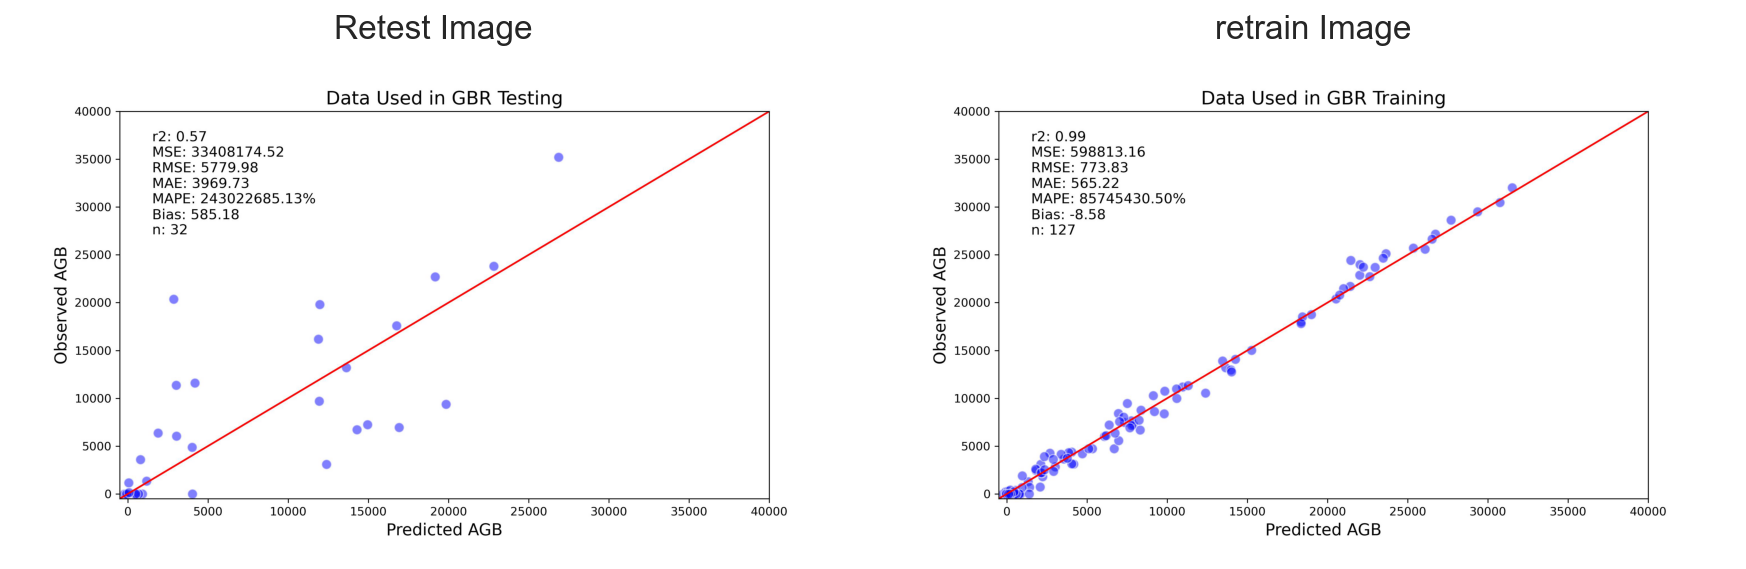

----------------------------------------------------------------------------------------------------


,Metric,Retest,Retrain
0,R² (retest),0.8900000000,NaN
1,MSE (retest),7342887.2900000000,NaN
2,RMSE (retest),2709.7800000000,NaN
3,MAE (retest),1676.3000000000,NaN
4,MAPE (retest),336670779.0299999714,NaN
5,Bias (retest),19.1100000000,NaN
6,N (retest),31.0000000000,NaN


Features Used: ['b1_hcv_p99', 'b3_dp1fm_dry_p99', 'b2_dp1fm_p99', 'b1_dp1fm_p99', 'b1_dbifm_p99', 'b3_dp1fm_p99', 'b1_hmc_p99', 'b2_dbifm_p99', 'b1_dp1fm_dry_p99', 'b1_h25_p99', 'b1_hsd_p99', 'b2_dp1fm_dry_p99']
----------------------------------------------------------------------------------------------------
Path: H:/biomass/model_all01_02_03_04_05_06_v3/AGB/all02_rs30/GBR/p99/std3/all0/r2/sel_num_12
If using - create directory: all02_rs30_GBR_p99_std3_all0_r2_sel_num_12
 - Retest Image found: H:/biomass/model_all01_02_03_04_05_06_v3/AGB/all02_rs30/GBR/p99/std3/all0/r2/sel_num_12\AGB_all02_rs30_GBR_r2_top_12_retest.JPG
 - retrain Image found: H:/biomass/model_all01_02_03_04_05_06_v3/AGB/all02_rs30/GBR/p99/std3/all0/r2/sel_num_12\AGB_all02_rs30_GBR_r2_top_12_retrain.JPG


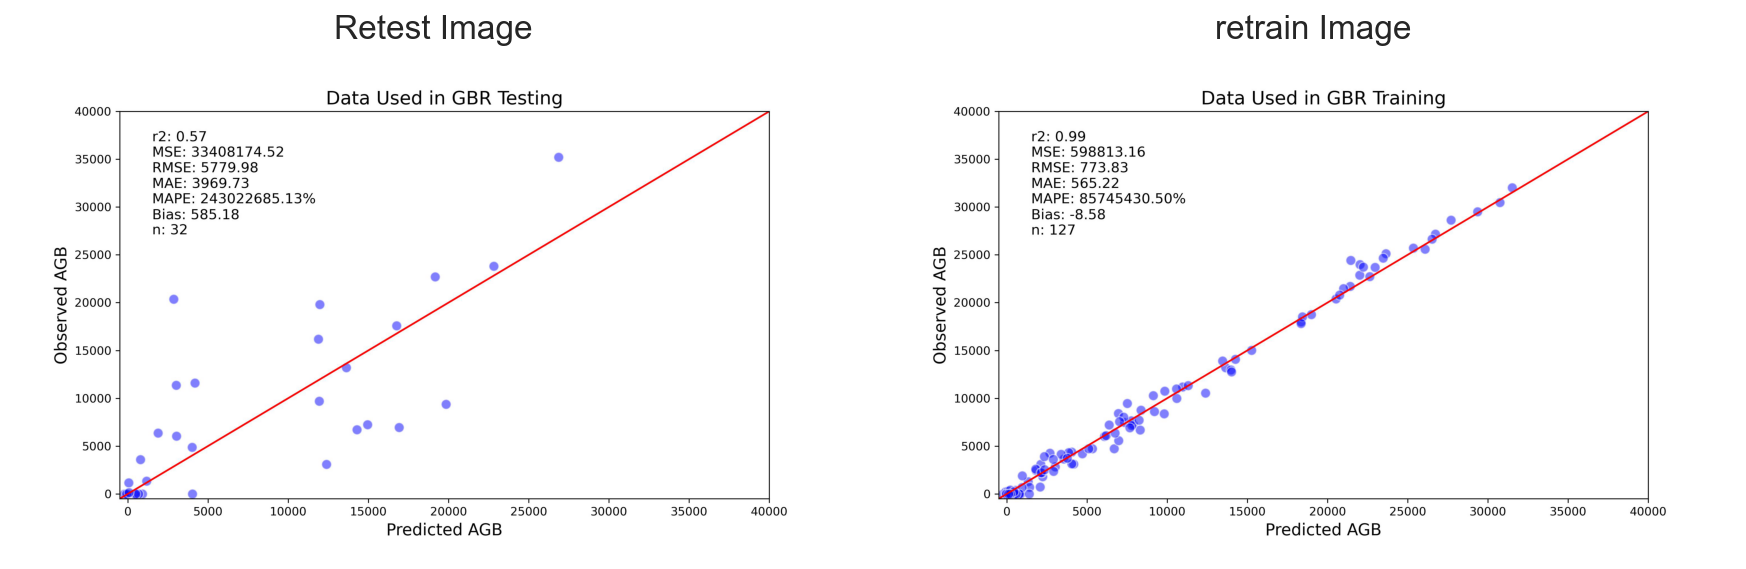

----------------------------------------------------------------------------------------------------


,Metric,Retest,Retrain
0,R² (retest),0.8900000000,NaN
1,MSE (retest),7342887.2900000000,NaN
2,RMSE (retest),2709.7800000000,NaN
3,MAE (retest),1676.3000000000,NaN
4,MAPE (retest),336670779.0299999714,NaN
5,Bias (retest),19.1100000000,NaN
6,N (retest),31.0000000000,NaN


Features Used: ['b1_hcv_p99', 'b3_dp1fm_dry_p99', 'b2_dp1fm_p99', 'b1_dp1fm_p99', 'b1_dbifm_p99', 'b3_dp1fm_p99', 'b1_hmc_p99', 'b2_dbifm_p99', 'b1_dp1fm_dry_p99', 'b1_h25_p99', 'b1_hsd_p99', 'b2_dp1fm_dry_p99']
----------------------------------------------------------------------------------------------------
Path: H:/biomass/model_all01_02_03_04_05_06_v3/AGB/all02_rs30/GBR/p99/std3/all0/RMSE/sel_num_15
If using - create directory: all02_rs30_GBR_p99_std3_all0_RMSE_sel_num_15
 - Retest Image found: H:/biomass/model_all01_02_03_04_05_06_v3/AGB/all02_rs30/GBR/p99/std3/all0/RMSE/sel_num_15\AGB_all02_rs30_GBR_RMSE_top_15_retest.JPG
 - retrain Image found: H:/biomass/model_all01_02_03_04_05_06_v3/AGB/all02_rs30/GBR/p99/std3/all0/RMSE/sel_num_15\AGB_all02_rs30_GBR_RMSE_top_15_retrain.JPG


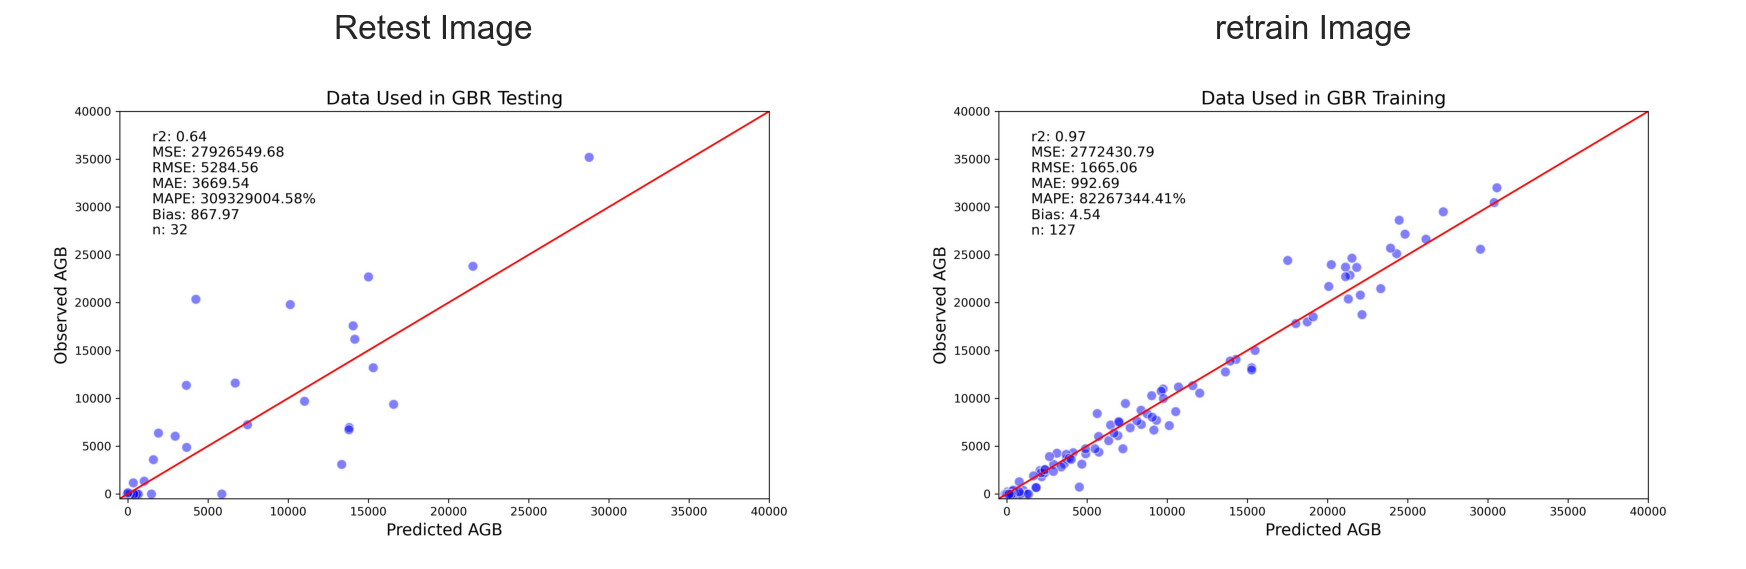

----------------------------------------------------------------------------------------------------


,Metric,Retest,Retrain
0,R² (retest),0.8800000000,NaN
1,MSE (retest),7715751.2199999997,NaN
2,RMSE (retest),2777.7200000000,NaN
3,MAE (retest),1990.8700000000,NaN
4,MAPE (retest),465798671.2400000095,NaN
5,Bias (retest),-854.7400000000,NaN
6,N (retest),31.0000000000,NaN


Features Used: ['b4_dbifm_p99', 'b3_dp1fm_p99', 'b2_dp1fm_p99', 'dbifmdry_GNDVI', 'b5_dbifm_p99', 'b1_hcv_p99', 'b3_dbifm_p99', 'b1_dbifm_p99', 'b1_h99_p99', 'b2_dp1fm_dry_p99', 'b1_hsd_p99', 'b1_hmc_p99', 'b1_h25_p99', 'b1_dp1fm_p99', 'b1_wfp_dry_p99']
----------------------------------------------------------------------------------------------------
Path: H:/biomass/model_all01_02_03_04_05_06_v3/AGB/all02_rs30/GBR/p99/std3/all0/RMSE/sel_num_15
If using - create directory: all02_rs30_GBR_p99_std3_all0_RMSE_sel_num_15
 - Retest Image found: H:/biomass/model_all01_02_03_04_05_06_v3/AGB/all02_rs30/GBR/p99/std3/all0/RMSE/sel_num_15\AGB_all02_rs30_GBR_RMSE_top_15_retest.JPG
 - retrain Image found: H:/biomass/model_all01_02_03_04_05_06_v3/AGB/all02_rs30/GBR/p99/std3/all0/RMSE/sel_num_15\AGB_all02_rs30_GBR_RMSE_top_15_retrain.JPG


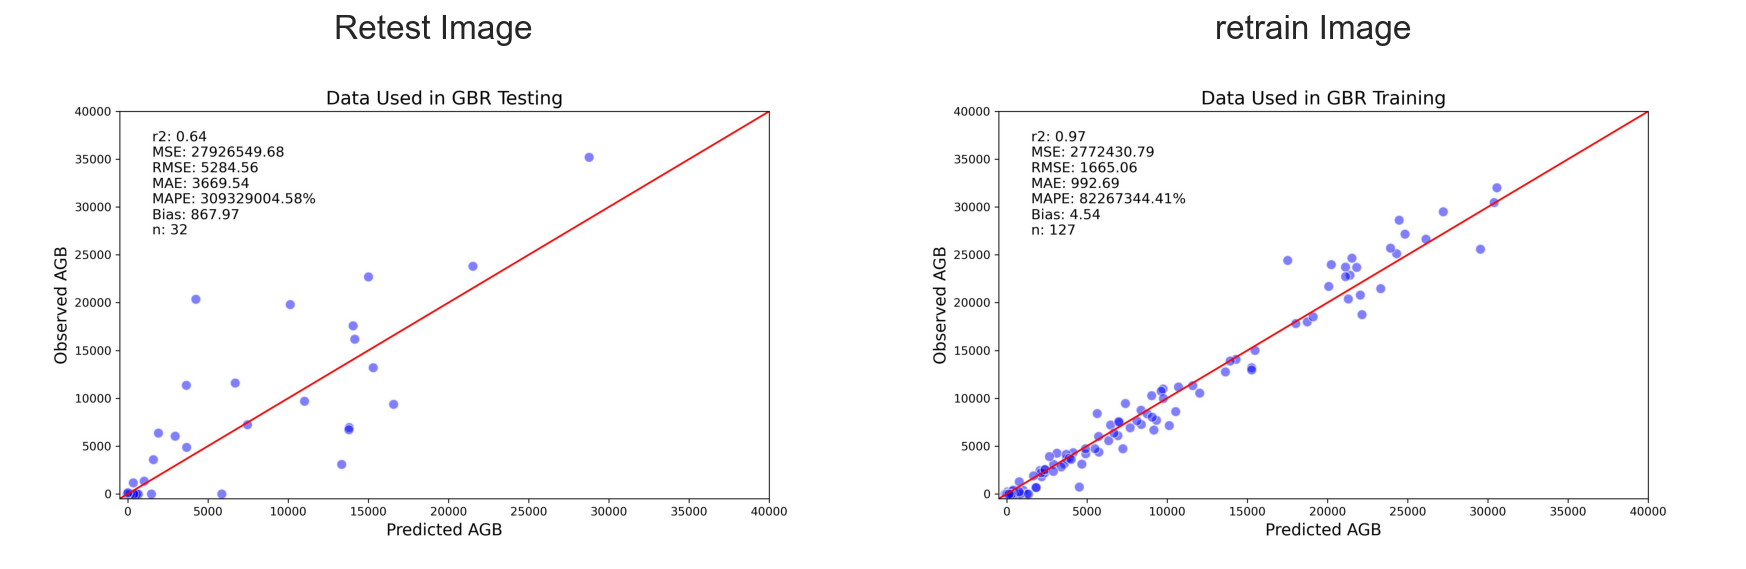

----------------------------------------------------------------------------------------------------


,Metric,Retest,Retrain
0,R² (retest),0.8800000000,NaN
1,MSE (retest),7715751.2199999997,NaN
2,RMSE (retest),2777.7200000000,NaN
3,MAE (retest),1990.8700000000,NaN
4,MAPE (retest),465798671.2400000095,NaN
5,Bias (retest),-854.7400000000,NaN
6,N (retest),31.0000000000,NaN


Features Used: ['b4_dbifm_p99', 'b3_dp1fm_p99', 'b2_dp1fm_p99', 'dbifmdry_GNDVI', 'b5_dbifm_p99', 'b1_hcv_p99', 'b3_dbifm_p99', 'b1_dbifm_p99', 'b1_h99_p99', 'b2_dp1fm_dry_p99', 'b1_hsd_p99', 'b1_hmc_p99', 'b1_h25_p99', 'b1_dp1fm_p99', 'b1_wfp_dry_p99']
----------------------------------------------------------------------------------------------------
Path: H:/biomass/model_all01_02_03_04_05_06_v3/AGB/all02_rs30/XGBR/p99/std3/all0/RMSE/sel_num_12
If using - create directory: all02_rs30_XGBR_p99_std3_all0_RMSE_sel_num_12
 - Retest Image found: H:/biomass/model_all01_02_03_04_05_06_v3/AGB/all02_rs30/XGBR/p99/std3/all0/RMSE/sel_num_12\AGB_all02_rs30_XGBR_RMSE_top_12_retest.JPG
 - retrain Image found: H:/biomass/model_all01_02_03_04_05_06_v3/AGB/all02_rs30/XGBR/p99/std3/all0/RMSE/sel_num_12\AGB_all02_rs30_XGBR_RMSE_top_12_retrain.JPG


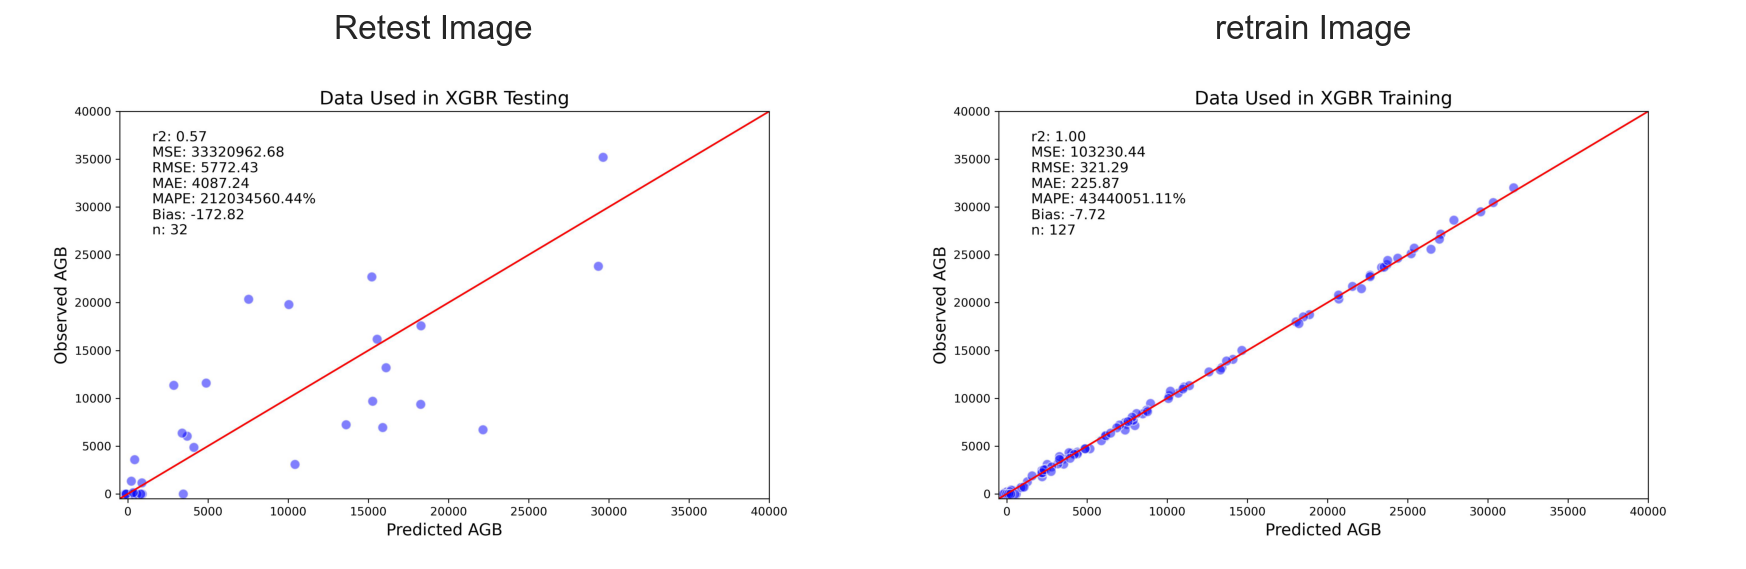

----------------------------------------------------------------------------------------------------


,Metric,Retest,Retrain
0,R² (retest),0.8800000000,NaN
1,MSE (retest),7944807.9199999999,NaN
2,RMSE (retest),2818.6500000000,NaN
3,MAE (retest),1855.2600000000,NaN
4,MAPE (retest),330040355.9399999976,NaN
5,Bias (retest),-434.0600000000,NaN
6,N (retest),31.0000000000,NaN


Features Used: ['b1_h99_p99', 'b1_hcv_p99', 'b3_dp1fm_dry_p99', 'b3_dp1fm_p99', 'b1_h25_p99', 'b2_dp1fm_dry_p99', 'b1_dbifm_p99', 'b1_dp1fm_p99', 'b2_dp1fm_p99', 'b2_dbifm_p99', 'b1_hmc_p99', 'b1_dp1fm_dry_p99']
----------------------------------------------------------------------------------------------------
Display limit reached. Adjust the display limit to see more images.
exported to:  C:\Users\robot\code\pipelines\apply_biomass\model_all01_02_03_04_05_06_v3_top_top_top_top_overall_best.csv


In [15]:
best_df, model_run, model, var, data, std = plot_best_model(mdl_sel_df, model_run, "top", "top", "top", "top", 5)

In [23]:
best_df.to_csv(r"C:\Users\robot\code\pipelines\apply_biomass\{0}_{1}_{2}_{3}_{4}_rs30_all02_overall_best.csv".format(model_run, model, var, data, std))

In [24]:
best_df

,r2_retrain,mse_retrain,rmse_retrain,mae_retrain,mape_retrain,bias_retrain,n_retrain,status_retrain,features_retrain,r2_retest,...,fac,stdev,sel_num,data,stats,features_retest,model,file,file_path,apply_mdl
1316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7200000000,...,RMSE,3.0000000000,20.0000000000,all0,mean,"['b3_dp1fm_dry_mean', 'b1_dbifm_mean', 'dbifmd...",KNeighborsRegressor(),all02_rs30_RMSE_KNN_sel_20_variable_score.csv,H:/biomass/model_all01_02_03_04_05_06_v2/AGB/a...,NaN
452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7200000000,...,RMSE,3.0000000000,20.0000000000,all0,mean,"['b3_dp1fm_dry_mean', 'b1_dbifm_mean', 'dbifmd...",KNeighborsRegressor(),all02_rs30_RMSE_KNN_sel_20_variable_score.csv,H:/biomass/model_all01_02_03_04_05_06_v2/AGB/a...,NaN
1249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7200000000,...,r2,3.0000000000,25.0000000000,all0,mean,"['b1_dbifm_mean', 'b5_dbifm_mean', 'b4_dbifm_m...","GradientBoostingRegressor(learning_rate=0.05, ...",all02_rs30_r2_GBR_sel_25_variable_score.csv,H:/biomass/model_all01_02_03_04_05_06_v2/AGB/a...,NaN
385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7200000000,...,r2,3.0000000000,25.0000000000,all0,mean,"['b1_dbifm_mean', 'b5_dbifm_mean', 'b4_dbifm_m...","GradientBoostingRegressor(learning_rate=0.05, ...",all02_rs30_r2_GBR_sel_25_variable_score.csv,H:/biomass/model_all01_02_03_04_05_06_v2/AGB/a...,NaN
288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7200000000,...,r2,3.0000000000,40.0000000000,all0,mean,"['b1_h99_mean', 'dbifmdry_GNDVI', 'b1_hsd_mean...","RandomForestRegressor(max_depth=3, max_feature...",all02_rs30_r2_RFR_sel_40_variable_score.csv,H:/biomass/model_all01_02_03_04_05_06_v2/AGB/a...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,all02_rs30_KNN_mean_std3_all0_RMSE_sel_num_20
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,all02_rs30_KNN_mean_std3_all0_RMSE_sel_num_20
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,all02_rs30_GBR_mean_std3_all0_r2_sel_num_25
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,all02_rs30_GBR_mean_std3_all0_r2_sel_num_25


In [25]:
best_df.describe()

,r2_retrain,mse_retrain,rmse_retrain,mae_retrain,mape_retrain,bias_retrain,n_retrain,r2_retest,mse_retest,rmse_retest,mae_retest,mape_retest,bias_retest,n_retest,stdev,sel_num
count,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,248.0000000000,248.0000000000,248.0000000000,248.0000000000,248.0000000000,248.0000000000,248.0000000000,248.0000000000,248.0000000000
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6554838710,17970851.5016935505,4128.7561290323,2925.2130645161,857912798.9704031944,-209.1782258065,37.0000000000,3.0000000000,19.7661290323
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0381633998,8899726.2448986676,963.3080575028,392.5471146867,273355728.4826414585,659.9974738843,0.0000000000,0.0000000000,9.5401210077
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6000000000,10617495.5999999996,3258.4500000000,2306.3900000000,303615952.3999999762,-1399.1300000000,37.0000000000,3.0000000000,10.0000000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6200000000,11960172.8249999993,3458.3500000000,2624.3825000000,589499912.7424999475,-702.8675000000,37.0000000000,3.0000000000,12.0000000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6600000000,13424814.7599999998,3663.9900000000,2815.5450000000,943900472.5550000668,-448.8500000000,37.0000000000,3.0000000000,15.0000000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6900000000,26888898.2225000001,5184.6050000000,3125.2850000000,1022497587.4825000763,332.9800000000,37.0000000000,3.0000000000,25.0000000000
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7200000000,34368338.8400000036,5862.4500000000,3855.7400000000,1523428639.6400001049,1245.6700000000,37.0000000000,3.0000000000,40.0000000000


In [26]:
# Find the model with the lowest RMSE
best_perform_model = best_df.loc[best_df['rmse_retest'].idxmin()]

# Calculate summary statistics
summary_stats = best_df.describe()

# Output results
print("Summary Statistics:")
print(summary_stats)
print("\nModel with the Lowest RMSE:")
print(best_perform_model)

Summary Statistics:
        r2_retrain  mse_retrain  rmse_retrain  mae_retrain  mape_retrain  \
count 0.0000000000 0.0000000000  0.0000000000 0.0000000000  0.0000000000   
mean           NaN          NaN           NaN          NaN           NaN   
std            NaN          NaN           NaN          NaN           NaN   
min            NaN          NaN           NaN          NaN           NaN   
25%            NaN          NaN           NaN          NaN           NaN   
50%            NaN          NaN           NaN          NaN           NaN   
75%            NaN          NaN           NaN          NaN           NaN   
max            NaN          NaN           NaN          NaN           NaN   

       bias_retrain    n_retrain      r2_retest          mse_retest  \
count  0.0000000000 0.0000000000 248.0000000000      248.0000000000   
mean            NaN          NaN   0.6554838710 17970851.5016935505   
std             NaN          NaN   0.0381633998  8899726.2448986676   
min        

In [27]:
# Normalise metrics
best_df['RMSE_norm'] = best_df['rmse_retest'] / best_df['rmse_retest'].max()  # Lower is better
best_df['MAE_norm'] = best_df['mae_retest'] / best_df['mae_retest'].max()    # Lower is better
best_df['R2_norm'] = 1 - ((best_df['r2_retest'].max() - best_df['r2_retest']) / (best_df['r2_retest'].max() - best_df['r2_retest'].min()))  # Higher is better

# Assign weights to each metric (optional)
weights = {'rmse_retest': 0.8, 'mae_retest': 0.1, 'r2_retest': 0.1}

# Calculate combined score
best_df['Score'] = (
    best_df['RMSE_norm'] * weights['rmse_retest'] +
    best_df['MAE_norm'] * weights['mae_retest'] +
    best_df['R2_norm'] * weights['r2_retest']
)

# Rank models based on the score
best_df['Rank'] = best_df['Score'].rank(ascending=True)

# Sort by rank
df_rank = best_df.sort_values(by='Rank')

# Output results
df_rank[['mdl', 'rmse_retest', 'mae_retest', 'r2_retest', 'Score', 'Rank', 'file_path', 'model', 'features_retest']]

,mdl,rmse_retest,mae_retest,r2_retest,Score,Rank,file_path,model,features_retest
1316,KNN,3258.4500000000,2306.3900000000,0.7200000000,0.6044707377,1.5000000000,H:/biomass/model_all01_02_03_04_05_06_v2/AGB/a...,KNeighborsRegressor(),"['b3_dp1fm_dry_mean', 'b1_dbifm_mean', 'dbifmd..."
452,KNN,3258.4500000000,2306.3900000000,0.7200000000,0.6044707377,1.5000000000,H:/biomass/model_all01_02_03_04_05_06_v2/AGB/a...,KNeighborsRegressor(),"['b3_dp1fm_dry_mean', 'b1_dbifm_mean', 'dbifmd..."
391,GBR,3812.3700000000,2671.0600000000,0.6200000000,0.6061841266,3.5000000000,H:/biomass/model_all01_02_03_04_05_06_v2/AGB/a...,"GradientBoostingRegressor(learning_rate=0.05, ...","['b3_dp1fm_dry_mean', 'b1_ccw_dry_mean', 'b1_h..."
1255,GBR,3812.3700000000,2671.0600000000,0.6200000000,0.6061841266,3.5000000000,H:/biomass/model_all01_02_03_04_05_06_v2/AGB/a...,"GradientBoostingRegressor(learning_rate=0.05, ...","['b3_dp1fm_dry_mean', 'b1_ccw_dry_mean', 'b1_h..."
1309,KNN,3540.6000000000,2518.6300000000,0.6700000000,0.6068112654,10.5000000000,H:/biomass/model_all01_02_03_04_05_06_v2/AGB/a...,"KNeighborsRegressor(n_neighbors=15, weights='d...","['b1_wfp_dry_mean', 'b1_ccw_dry_mean', 'b1_hsd..."
...,...,...,...,...,...,...,...,...,...
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# Group by 'mdl' and get the best rank (minimum score) per model
best_rank_per_model = df_rank.groupby('mdl', as_index=False).first()

# Sort the models by Rank for clear display
best_rank_per_model = best_rank_per_model.sort_values(by='Rank')

# Output the results
print("Best Rank for Each Model:")
best_rank_per_model[['mdl', 'rmse_retest', 'mae_retest', 'r2_retest', 'Score', 'Rank', 'file_path', 'model', 'features_retest']]


Best Rank for Each Model:


,mdl,rmse_retest,mae_retest,r2_retest,Score,Rank,file_path,model,features_retest
2,KNN,3258.4500000000,2306.3900000000,0.7200000000,0.6044707377,1.5000000000,H:/biomass/model_all01_02_03_04_05_06_v2/AGB/a...,KNeighborsRegressor(),"['b3_dp1fm_dry_mean', 'b1_dbifm_mean', 'dbifmd..."
1,GBR,3812.3700000000,2671.0600000000,0.6200000000,0.6061841266,3.5000000000,H:/biomass/model_all01_02_03_04_05_06_v2/AGB/a...,"GradientBoostingRegressor(learning_rate=0.05, ...","['b3_dp1fm_dry_mean', 'b1_ccw_dry_mean', 'b1_h..."
0,ABR,3377.8900000000,2446.5000000000,0.7000000000,0.6077368618,19.5000000000,H:/biomass/model_all01_02_03_04_05_06_v2/AGB/a...,AdaBoostRegressor(estimator=DecisionTreeRegres...,"['b1_h99_mean', 'b1_h25_mean', 'b1_dbifm_mean'..."
4,XGBR,3269.9000000000,2427.0400000000,0.7200000000,0.6091623254,30.5000000000,H:/biomass/model_all01_02_03_04_05_06_v2/AGB/a...,"XGBRegressor(base_score=None, booster=None, ca...","['dbifman_NBR', 'dbifmdry_r54', 'b1_h99_mean',..."
3,RFR,3808.8100000000,2804.9000000000,0.6200000000,0.6091695113,33.5000000000,H:/biomass/model_all01_02_03_04_05_06_v2/AGB/a...,RandomForestRegressor(),"['b3_dp1fm_mean', 'b1_hmc_mean', 'b1_wfp_dry_m..."


In [29]:
best_rank_per_model.to_csv(r"C:\Users\robot\code\pipelines\apply_biomass\{0}_{1}_{2}_{3}_{4}_AGB_best_model_results_rs30_all02.csv".format(model_run, model, var, data, std))
#best_rank_per_model.to_csv(r"H:\biomass\model_test_train_all01_02_03_04_05_06_final\AGB_best_model_results_rs50_all05.csv", index=False)
print(r"C:\Users\robot\code\pipelines\apply_biomass\{0}_{1}_{2}_{3}_{4}_AGB_best_model_results_rs30_all02.csv".format(model_run, model, var, data, std))

C:\Users\robot\code\pipelines\apply_biomass\model_all01_02_03_04_05_06_v2_top_top_top_top_AGB_best_model_results_rs30_all02.csv


In [30]:
# Normalise metrics
best_df['RMSE_norm'] = best_df['rmse_retest'] / best_df['rmse_retest'].max()  # Lower is better
best_df['MAE_norm'] = best_df['mae_retest'] / best_df['mae_retest'].max()    # Lower is better
best_df['R2_norm'] = 1 - ((best_df['r2_retest'].max() - best_df['r2_retest']) / 
                          (best_df['r2_retest'].max() - best_df['r2_retest'].min()))  # Higher is better

# Assign weights to each metric (optional)
weights = {'RMSE_norm': 0.8, 'MAE_norm': 0.1, 'R2_norm': 0.1}
# Group by 'mdl' to calculate the mean rank and mean score for each model type
overall_ranking = df_rank.groupby('mdl', as_index=False).agg({
    'Score': 'mean',  # Average score
    'Rank': 'mean'    # Average rank
}).sort_values(by='Rank')  # Sort by mean rank

# Rename columns for clarity
overall_ranking = overall_ranking.rename(columns={'Score': 'Mean_Score', 'Rank': 'Mean_Rank'})

# Display the overall ranking
print("Overall Model Performance:")
overall_ranking

Overall Model Performance:


,mdl,Mean_Score,Mean_Rank
2,KNN,0.6695802296,72.7222222222
0,ABR,0.6395325877,94.1666666667
3,RFR,0.6763934590,135.1774193548
1,GBR,0.7225298080,135.7962962963
4,XGBR,0.7053840709,159.0555555556


In [31]:
# Group by 'mdl' and find the row with the minimum 'rmse_retest' for each model
lowest_rmse_df = best_df.loc[best_df.groupby('mdl')['rmse_retest'].idxmin()]
# Reset index for cleaner presentation
lowest_rmse_df = lowest_rmse_df.reset_index(drop=True)

# Display the table with the lowest RMSE per model
print("Table of Lowest RMSE for Each Model:")
lowest_rmse_df

Table of Lowest RMSE for Each Model:


,r2_retrain,mse_retrain,rmse_retrain,mae_retrain,mape_retrain,bias_retrain,n_retrain,status_retrain,features_retrain,r2_retest,...,features_retest,model,file,file_path,apply_mdl,RMSE_norm,MAE_norm,R2_norm,Score,Rank
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7000000000,...,"['b1_h99_mean', 'b1_h25_mean', 'b1_dbifm_mean'...",AdaBoostRegressor(estimator=DecisionTreeRegres...,all02_rs30_r2_ABR_sel_40_variable_score.csv,H:/biomass/model_all01_02_03_04_05_06_v2/AGB/a...,NaN,0.5761908417,0.6345085509,0.8333333333,0.6077368618,19.5000000000
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7200000000,...,"['b1_dbifm_mean', 'b5_dbifm_mean', 'b4_dbifm_m...","GradientBoostingRegressor(learning_rate=0.05, ...",all02_rs30_r2_GBR_sel_25_variable_score.csv,H:/biomass/model_all01_02_03_04_05_06_v2/AGB/a...,NaN,0.5560371517,0.6230191870,1.0000000000,0.6071316401,17.5000000000
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7200000000,...,"['b3_dp1fm_dry_mean', 'b1_dbifm_mean', 'dbifmd...",KNeighborsRegressor(),all02_rs30_RMSE_KNN_sel_20_variable_score.csv,H:/biomass/model_all01_02_03_04_05_06_v2/AGB/a...,NaN,0.5558171072,0.5981705198,1.0000000000,0.6044707377,1.5000000000
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7200000000,...,"['b1_h99_mean', 'dbifmdry_GNDVI', 'b1_hsd_mean...","RandomForestRegressor(max_depth=3, max_feature...",all02_rs30_r2_RFR_sel_40_variable_score.csv,H:/biomass/model_all01_02_03_04_05_06_v2/AGB/a...,NaN,0.5570128530,0.6558481640,1.0000000000,0.6111950988,49.5000000000
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7200000000,...,"['dbifman_NBR', 'dbifmdry_r54', 'b1_h99_mean',...","XGBRegressor(base_score=None, booster=None, ca...",all02_rs30_MAE_XGBR_sel_40_variable_score.csv,H:/biomass/model_all01_02_03_04_05_06_v2/AGB/a...,NaN,0.5577702155,0.6294615301,1.0000000000,0.6091623254,30.5000000000


In [17]:
grouped_df = best_df.groupby(['mdl'])[['rmse_retest', 'r2_retest', 'mae_retest']].agg(['mean', 'std']).reset_index()
grouped_df


mdl      rmse_retest                     r2_retest               \
                    mean             std          mean          std   
0   ABR  4729.7926041667  969.5371345988  0.6925000000 0.1075768324   
1   GBR  4779.4293750000 1073.6805985771  0.6836458333 0.1233062827   
2   KNN  5311.1887500000  857.7495262882  0.6130208333 0.1110079455   
3   MLP 10847.7741666667 1034.3590131006 -0.5819791667 0.2241896159   
4   RFR  4674.6154166667  967.5411342343  0.6990625000 0.1063046903   
5  XGBR  4897.4760416667 1095.1411304862  0.6671875000 0.1264058379   

       mae_retest                  
             mean             std  
0 3368.9970833333  769.2675587045  
1 3201.7873958333  787.4480152259  
2 3597.9786458333  666.8936812297  
3 6867.3545833333 1079.9487472819  
4 3130.7334375000  752.4438556903  
5 3296.4680208333  808.6295395156

In [ ]:
best_df